In [1]:
#%matplotlib notebook
%matplotlib inline
from matplotlib import rc
rc('figure',figsize=(16,8))
rc('font',size=12)
rc('text',usetex=False)

from qubicpack import qubicpack as qp
import fibtools as ft
import plotters as p
import lin_lib as ll
import demodulation_lib as dl

from pysimulators import FitsArray

import numpy as np
from matplotlib.pyplot import *
import matplotlib.mlab as mlab
import scipy.ndimage.filters as f
import glob
import string
import scipy.signal as scsig
from scipy import interpolate

importing qubicpack without pystudio


In [2]:
dirfiles = '/Users/hamilton/Qubic/Calib-TD/ScanData/'
names = ['ScanMap_el', 'ScanMapNew_el','ScanMapNew2_start-40.5_el']
allfiles = []
allels = []
for nn in names:
    files = np.sort(glob.glob(dirfiles+'alltes*_'+nn+'_*.fits'))
    print len(files)
    el = np.zeros(len(files))
    for i in xrange(len(files)):
        el[i] = str.split(files[i],'_')[-1][:-5]
    allfiles.append(files)
    allels.append(el)


41
41
41


In [3]:
data = np.array(FitsArray(allfiles[0][0]))
sh = np.shape(data)
print sh

(256, 100)


In [41]:
alldata = []
for i in xrange(len(names)):
    thedata = np.zeros((len(el), sh[0], sh[1]))
    for j in xrange(len(el)):
        data = np.array(FitsArray(allfiles[i][j]))
        thedata[j,:,:] = (data.T-np.median(data,axis=1)).T
    alldata.append(thedata)

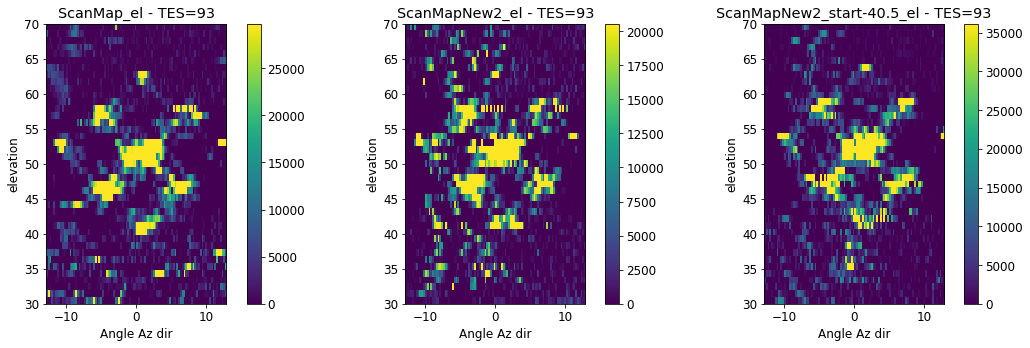

In [245]:
### Nice 61, 93!!!, 106, 184, 186, 191

rc('figure',figsize=(16,5))
TESNum = 93
for i in xrange(len(names)):
    subplot(1,3,i+1)
    img = alldata[i][:,TESNum-1,:]
    med = np.median(img)
    img -= med
    mm, ss = ft.meancut(img, 10)
    ns = 2
    imshow(img, extent=[-20*cos(np.radians(50)),20*cos(np.radians(50)), np.min(allels[0]), np.max(allels[0])], vmin=0, vmax=ns*ss, cmap='viridis')
    #imshow(np.log10(img), extent=[-20,20, np.min(allels[0]), np.max(allels[0])], vmin=-1, vmax=4, cmap='viridis')
    xlabel('Angle Az dir')
    ylabel('elevation')
    colorbar()
    title(names[i]+' - TES='+str(TESNum))
    tight_layout()
    

In [311]:
combinations = [[0,2], [1,2]]
data_tot = np.zeros((len(combinations),256, 41*2, sh[1]))
for ic in xrange(len(combinations)):
    cc = combinations[ic]
    d0 = alldata[cc[0]]
    d1 = alldata[cc[1]]
    for i in xrange(256):
        im0 = d0[:,i,:]
        im0 = ((im0.T-np.median(im0, axis=1))).T
        mm, ss = ft.meancut(im0, 3)
        im0 = im0 / ss
        im1 = d1[:,i,:]
        im1 = ((im1.T-np.median(im1, axis=1))).T
        mm, ss = ft.meancut(im1, 3)
        im1 = im1 / ss
        for j in xrange(41):
            data_tot[ic, i, 2*j, :] = im0[j,:]
            data_tot[ic, i, 2*j+1, :] = im1[j,:]
        
        

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


Text(0.5,1,'TES=93')

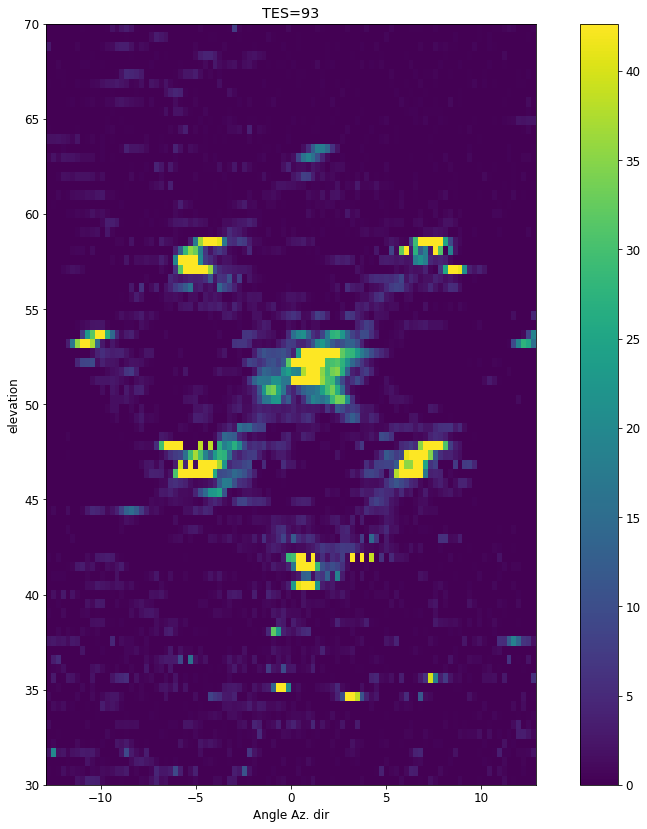

In [364]:
TESNum = 93
ic=0
img = data_tot[ic, TESNum-1, :,:]
med = np.median(img)
img -= med
mm, ss = ft.meancut(img, 10)
ns = 10
imshow(img, extent=[-20*cos(np.radians(50)),20*cos(np.radians(50)), 
                    np.min(allels[0]), np.max(allels[0])], vmin=0, vmax=ns*ss, 
       cmap='viridis', aspect='equal')
xlabel('Angle Az. dir')
ylabel('elevation')
colorbar()
title('TES='+str(TESNum))


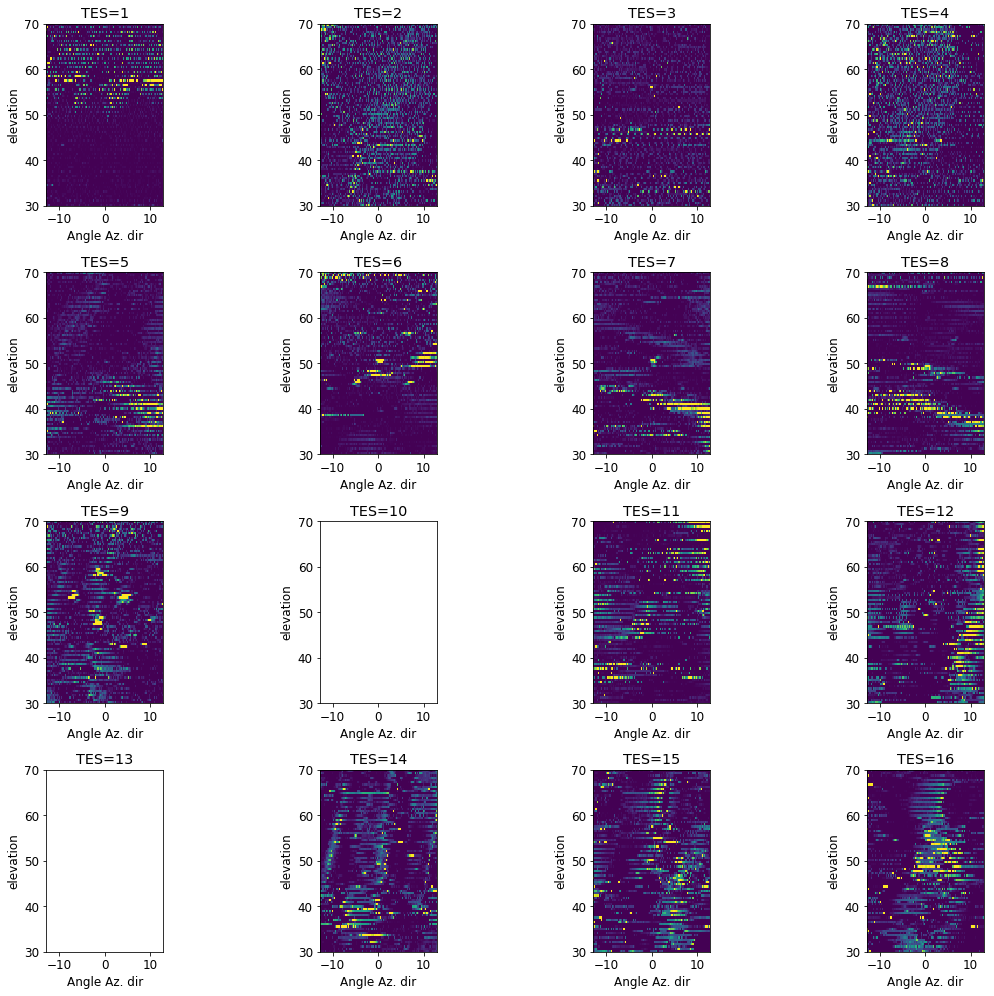

In [367]:
rc('figure',figsize=(16,14))
nn = 4
ic=0
serie = 0

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('multipage_pdf.pdf') as pdf:
    #for serie in xrange(15):
        for i in xrange(nn**2):
            subplot(nn,nn,i+1)
            TESNum = serie*nn**2+i+1
            img = data_tot[ic, TESNum-1, :,:]
            med = np.median(img)
            img -= med
            mm, ss = ft.meancut(img, 10)
            ns = 4
            imshow(img, extent=[-20*cos(np.radians(50)),20*cos(np.radians(50)), 
                                np.min(allels[0]), np.max(allels[0])], vmin=0, vmax=ns*ss, 
                   cmap='viridis', aspect='equal')
            xlabel('Angle Az. dir')
            ylabel('elevation')
            #colorbar()
            title('TES='+str(TESNum))
        #pdf.savefig()
        #close()
        tight_layout()


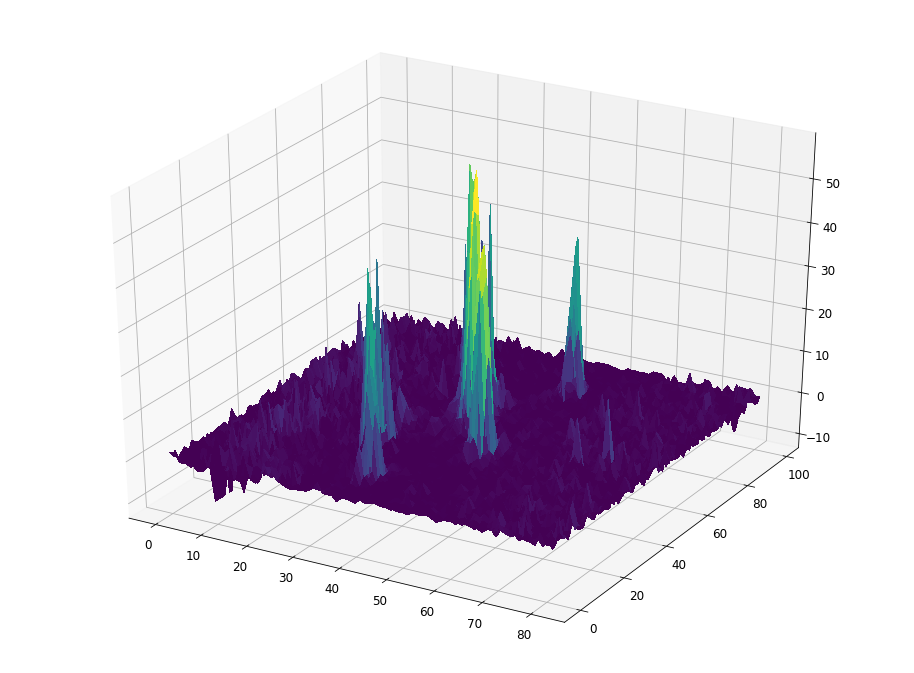

In [297]:
rc('figure',figsize=(16,12))
from mpl_toolkits.mplot3d import Axes3D
xx,yy = np.meshgrid(xrange(100), xrange(82))
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(yy,xx,img, rstride=1, cstride=1,
                       linewidth=0, antialiased=False, cmap='viridis',vmin=0)
